# Лабораторная работа 4
Регрессия и классификация в sklearn. Метрики регрессии классификации

Данная лабораторная выполняет в командах по 3-4 человека. Датасеты у команд не должны пересекаться.

## Регрессия

Ссылки на теорию:

- https://habr.com/ru/company/ods/blog/323890/
- https://habr.com/ru/post/278513/
- https://habr.com/ru/post/279117/

0. Загрузить датасет, подходящий для задачи регрессии. Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler


dataset = pd.read_csv("../datasets_regression/car_details.csv")

print(dataset.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


1. Удалить категориальные / бинарные признаки, оставив только вещественные.

In [142]:
dataset = dataset.drop(dataset.select_dtypes(exclude=['number']).columns)
         
print(dataset.head())

   year  selling_price  km_driven
0  2007          60000      70000
1  2007         135000      50000
2  2012         600000     100000
3  2017         250000      46000
4  2014         450000     141000


2. Визуализировать heatmap-матрицу кореллированности признаков.

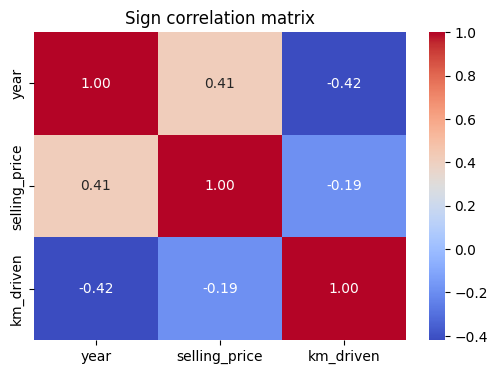

In [133]:
plt.figure(figsize=(6, 4))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sign correlation matrix")
plt.show()

3. Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью sns.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.

0
1


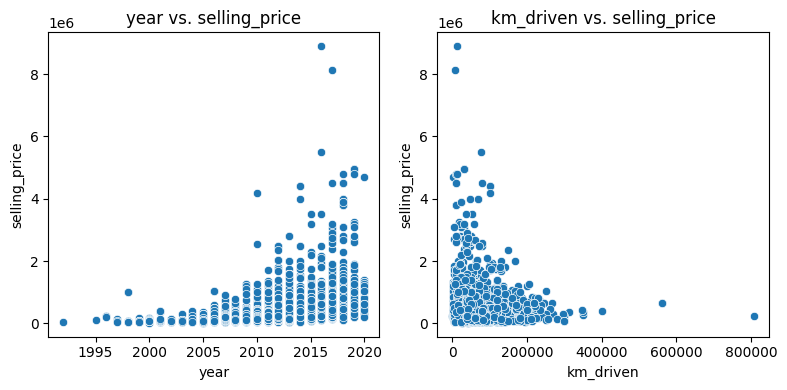

In [ ]:
features = [col for col in dataset.columns if col != 'selling_price' and dataset[col].dtype != 'object']

fig, axes = plt.subplots(1, len(features),\
                         figsize=(4 * len(features), 4))

for i, feature in enumerate(features):
  sns.scatterplot(x=dataset[feature],\
                  y=dataset['selling_price'],\
                  ax=axes[i])
  axes[i].set_title(f'{feature} vs. selling_price')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('selling_price')


plt.tight_layout()
plt.show()

4. Разделить набор данных на обучающую и тестовую выборки

In [135]:
x = StandardScaler().fit_transform(dataset.drop('selling_price', axis=1))
y = dataset['selling_price']

train: dict = {'x': np.empty, 'y': np.empty}
test:  dict = {'x': np.empty, 'y': np.empty}


train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.2, random_state=42)

##### 5. Линейная регрессия

5.1 Обучить модель линейной регрессии (LinearRegression)

In [136]:
model = LinearRegression()
model.fit(train['x'], train['y'])

LinearRegression()

5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [137]:
y_train_forecast: int = model.predict(train['x'])
y_test_forecast:  int = model.predict(test['x'])


mae_train: int = mean_absolute_error(train['y'], y_train_forecast)
mse_train: int = mean_squared_error(train['y'], y_train_forecast)
r2_train:  int = r2_score(train['y'], y_train_forecast)

mae_test: int = mean_absolute_error(test['y'], y_test_forecast)
mse_test: int = mean_squared_error(test['y'], y_test_forecast)
r2_test:  int = r2_score(test['y'], y_test_forecast)


print("Train dataset:")
print(f"MAE:\n\t {mae_train:.2f}")
print(f"MSE:\n\t {mse_train:.2f}")
print(f"R2: \n\t {r2_train:.2f}")

print("\nTest dataset:")
print(f"MAE:\n\t {mae_test:.2f}")
print(f"MSE:\n\t {mse_test:.2f}")
print(f"R2: \n\t {r2_test:.2f}")

Train dataset:
MAE:
	 274015.87
MSE:
	 282566785808.88
R2: 
	 0.17

Test dataset:
MAE:
	 256362.49
MSE:
	 255707328588.58
R2: 
	 0.16


5.3 Вывести model.coef_ и model.intercept_

In [138]:
print(f"Model coefficients: \n\t{model.coef_}")
print(f"\nPredicated target variable: \n\t{model.intercept_}")

Model coefficients: 
	[237821.853977   -14795.70113569]

Predicated target variable: 
	506227.87777309446


5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках. Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси.

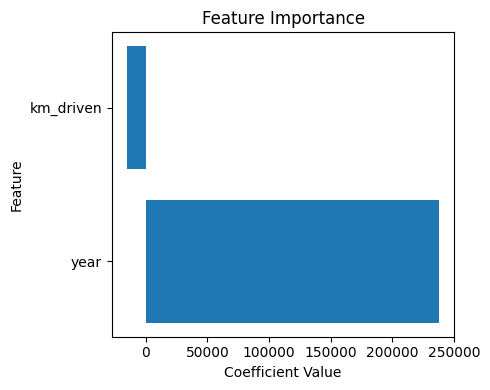

In [140]:
feature_importance = pd.DataFrame({'features': features, 'coefficient': model.coef_})

feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)


plt.figure(figsize=(5, 4))
plt.barh(feature_importance['features'], feature_importance['coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

## Классификация

Ссылки на теорию:

- https://habr.com/ru/post/685014/
- https://habr.com/ru/company/ods/blog/328372/
- https://habr.com/ru/post/491326/

0.  Загрузите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [ ]:
dataset = pd.read_csv("../datasets_classification/titanic.csv").\
                                    drop('PassengerId', axis=1).\
                                    drop('Name', axis=1).\
                                    drop('SibSp', axis=1).\
                                    drop('Parch', axis=1).\
                                    drop('Ticket', axis=1).\
                                    drop('Fare', axis=1).\
                                    drop('Cabin', axis=1).\
                                    drop('Embarked', axis=1)

dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset = pd.get_dummies(dataset, columns=['Sex', 'Survived'], drop_first=True)

print(dataset.head())

   Pclass   Age  Sex_male  Survived_1
0       3  22.0      True       False
1       1  38.0     False        True
2       3  26.0     False        True
3       1  35.0     False        True
4       3  35.0      True       False


**1. Многоклассовая классификация:**

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics   import accuracy_score


x = StandardScaler().fit_transform(dataset.drop('Survived_1', axis=1))
y = dataset['Survived_1']

train: dict = {'x': np.empty, 'y': np.empty}
test:  dict = {'x': np.empty, 'y': np.empty}

train['x'], test['x'], train['y'], test['y'] = train_test_split(x, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train['x'], train['y'])
forecast: bool = knn.predict(test['x'])


print(f"Accuracy: {accuracy_score(test['y'], forecast): .2f}")

Accuracy:  0.83


1.2. То же самое с использованием кросс-валидации

In [218]:
from sklearn.model_selection import cross_val_score

scores: np.ndarray = cross_val_score(knn, x, y, cv=5)
print(f"Cross value score: {scores}")
print(f"Mean cross value score: {scores.mean():.2f}")

Cross value score: [0.80446927 0.81460674 0.80337079 0.76966292 0.79775281]
Mean cross value score: 0.80


1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

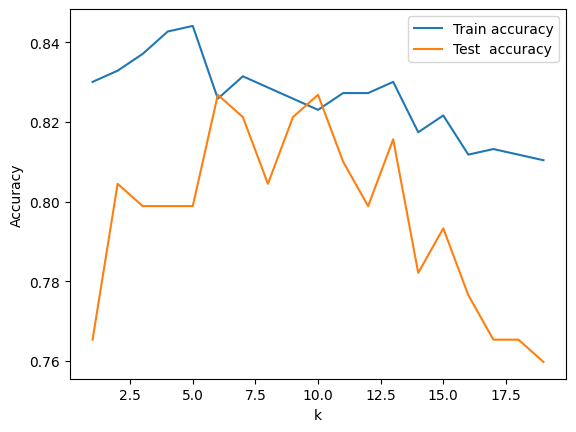

In [225]:
train_accuracy: list = []
test_accuracy : list = []
k_values: range = range(1, 20)


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train['x'], train['y'])
    
    train_accuracy.append(accuracy_score(train['y'], knn.predict(train['x'])))
    test_accuracy .append(accuracy_score(test ['y'], knn.predict(test ['x'])))

plt.plot(k_values, train_accuracy, label='Train accuracy')
plt.plot(k_values, test_accuracy,  label='Test  accuracy')
plt.xlabel('k') 
plt.ylabel('Accuracy')
plt.legend()
plt.show()  

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

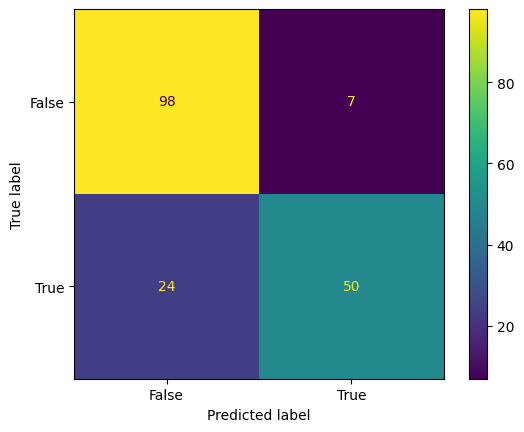

In [228]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(test['y'], forecast)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


svm.SVC().fit(train['x'], train['y'])

forecast = clf.predict(test['x'])

print('accuracy_score: ',   accuracy_score(test['y'], forecast))
print('recall_score: ',     recall_score(test['y'], forecast))
print('precision_score: ',  precision_score(test['y'], forecast))
print('f1_score: ',         f1_score(test['y'], forecast))
print('classification_report:\n', classification_report(test['y'], forecast))

accuracy_score:  0.8044692737430168
recall_score:  0.7027027027027027
precision_score:  0.8
f1_score:  0.7482014388489209
classification_report:
              precision    recall  f1-score   support

       False       0.81      0.88      0.84       105
        True       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179




**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [ ]:
from sklearn.preprocessing import MinMaxScaler


mmscaler = MinMaxScaler().fit(train['x'])
X_train_scaled = mmscaler.transform(train['x'])


clf = svm.SVC()
clf.fit(X_train_scaled, train['y'])

X_test_scaled = mmscaler.transform(test['x'])

forecast = clf.predict(X_test_scaled)
print('\tnormalaized:')
print('accuracy_score: ',   accuracy_score(test['y'], forecast))
print('recall_score: ',     recall_score(test['y'], forecast))
print('precision_score: ',  precision_score(test['y'], forecast))
print('f1_score: ',         f1_score(test['y'], forecast))
print('classification_report:\n', classification_report(test['y'], forecast))



clf.fit(train['x'], train['y'])
forecast = clf.predict(test['x'])

print('\n\n\twith input data:')
print('accuracy_score: ',   accuracy_score(test['y'], forecast))
print('recall_score: ',     recall_score(test['y'], forecast))
print('precision_score: ',  precision_score(test['y'], forecast))
print('f1_score: ',         f1_score(test['y'], forecast))
print('classification_report:\n', classification_report(test['y'], forecast))

	normalaized:
accuracy_score:  0.7653631284916201
recall_score:  0.4864864864864865
precision_score:  0.9
f1_score:  0.631578947368421
classification_report:
               precision    recall  f1-score   support

       False       0.73      0.96      0.83       105
        True       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179



	with input data:
accuracy_score:  0.770949720670391
recall_score:  0.5
precision_score:  0.9024390243902439
f1_score:  0.6434782608695652
classification_report:
               precision    recall  f1-score   support

       False       0.73      0.96      0.83       105
        True       0.90      0.50      0.64        74

    accuracy                           0.77       179
   macro avg       0.82      0.73      0.74       179
weighted avg       0.80      0.77      0.75       179

